

# 載入資料


In [1]:
import numpy as np
import pandas as pd

from keras.utils import  np_utils
from keras.datasets import mnist


In [2]:
(x_train,y_train) , (x_test,y_test) = mnist.load_data()  #讀取手寫資料
print('train_data=',len(x_train))
print('test_data=',len(x_test))


11493376/11490434 [==============================] - 0s 0us/step
train_data= 60000
test_data= 10000


# 畫圖
(長,寬,顏色)=(28,28,1)<br>
顏色欄位為1，因為只有灰階，其值為0(白色)到256(黑色)之間

In [3]:
x_train=x_train.reshape(60000,28,28,1)   #有60000筆資料 每一筆為28*28，轉換成(28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train[9487].shape             #驗證一下第9487筆的格式

(28, 28, 1)

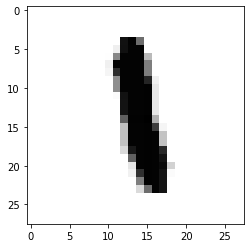

In [4]:
import matplotlib.pyplot as plt  #畫出來
%matplotlib inline
X=x_train[9487][:,:,0]
plt.imshow(X, cmap='Greys')

In [5]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

# 資料預處理
### 拉成一維 <br>
784=28*28

In [9]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

## 正規化
將資料轉成0~1之間

In [ ]:
x_train = x_train/255
x_test = x_test/255
x_train[0] #看第一筆

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# One hot encoding
將數字0~9 丟到10個籃子，1表示有，0表示沒有

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_test[:5]  #看前五筆資料

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 打造MLP


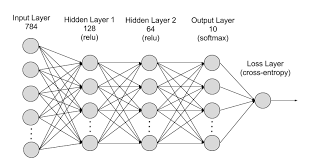

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential() #建造模型

#輸入層
model.add(Dense(units=128,        #隱藏層設定128個神經元
     input_dim=784,
     kernel_initializer='normal',
     activation='relu'   ) )

model.add(Dropout(0.25))        #拋棄層防止過度擬合

#第一隱藏層
model.add(Dense(units=64,        #隱藏層設定64個神經元
     kernel_initializer='normal',
     activation='relu'   ) )

model.add(Dropout(0.25))        #拋棄層防止過度擬合


#輸出層
model.add(Dense(units=10,        #輸出層因為有10個籃子，設定10個神經元，代表數字0-9
                
     kernel_initializer='normal',
     activation='softmax'   ) )

In [ ]:
model.summary() #看一下模型 架構

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*128+128

100480

In [ ]:
#定義訓練方式
model.compile(loss='categorical_crossentropy',
       optimizer='adam',
       metrics=['accuracy'])

In [ ]:
#訓練
model.fit(x_train, y_train,validation_split=0.2, batch_size=100, epochs=12)

Epoch 1/12
480/480 [==============================] - 1s 3ms/step - loss: 0.5561 - accuracy: 0.8377 - val_loss: 0.2017 - val_accuracy: 0.9409
Epoch 2/12
480/480 [==============================] - 1s 2ms/step - loss: 0.2342 - accuracy: 0.9315 - val_loss: 0.1476 - val_accuracy: 0.9566
Epoch 3/12
480/480 [==============================] - 1s 2ms/step - loss: 0.1775 - accuracy: 0.9486 - val_loss: 0.1221 - val_accuracy: 0.9643
Epoch 4/12
480/480 [==============================] - 1s 2ms/step - loss: 0.1463 - accuracy: 0.9555 - val_loss: 0.1075 - val_accuracy: 0.9685
Epoch 5/12
480/480 [==============================] - 1s 2ms/step - loss: 0.1255 - accuracy: 0.9627 - val_loss: 0.0953 - val_accuracy: 0.9712
Epoch 6/12
480/480 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9661 - val_loss: 0.0927 - val_accuracy: 0.9731
Epoch 7/12
480/480 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9685 - val_loss: 0.1003 - val_accuracy: 0.9701
Epoch 

# 模型準度

In [ ]:
score=model.evaluate(x_test,y_test)
print('loss:',score[0])
print('acc:',score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0717 - accuracy: 0.9781
loss: 0.0717453807592392
acc: 0.9781000018119812


# 預測

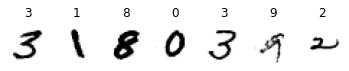

In [ ]:
predict = model.predict_classes(x_test)


pick=np.random.randint(1,9999,7) #隨機選七筆

for i in range(7):
    plt.subplot(1,7,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28),cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis('off')